1. Regressions 
- graphiques
- cartes 

2. Statistiques descriptives 
- graphiques
- cartes 

3. Tables de correlations, Balance tests

In [1]:
%cd /home/onyxia/work/monocentric-model-colombia-2021
import pandas as pd

total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 



/home/onyxia/work/monocentric-model-colombia-2021


La méthode d'echantillonage des bases du GEIH2021 

Le sampling se fait sur la population qui fait partie de la workforce (voir [DANE (2023)](https://microdatos.dane.gov.co/index.php/catalog/701/study-description#metadata-sampling) : "Weighting
Se diseñó una muestra para obtener una precisión esperada medida en términos del error de muestreo menor o igual a 5% con un nivel de confiabilidad del 95%, para los principales indicadores de fuerza laboral nacionales.")

On connait les données annuelles de la population formant la main d'oeuvre en Colombie ([World Bank (2023)](https://data.worldbank.org/indicator/SL.TLF.TOTL.IN?locations=CO)), d'environ 25 millions de personnes en 2021.

In [3]:
pd.crosstab(total_dataset_clean['fex_c_2011'] == total_dataset_clean['fex_c_2011_y'],columns="count") #memes variables, on peut utiliser l'un ou l'autre interchangeablement, pour les poids d'echantillonage

col_0,count
row_0,
True,26630


In [4]:
total_dataset_clean['fex_c_2011'].sum() #on trouve les memes ordres de grandeurs. Ne pas oublier que notre base est mensuelle et que le workforce est saisonnier et varie sur l'annee entiere.

23212041.07495462

In [ ]:
from IPython.display import display, Markdown

Variable Utilrank : 

La théorie de la consommation en microéconomie nous conduit à examiner l'effet de revenu sur les dépenses en logement, et plus spécifiquement la variable Utilrank. La variable Utilrank capture des caractéristiques personnelles liées à la richesse d'un ménage et de sa géolocalisation, ce qui permet d'étudier l'interaction entre richesse et location.

En Colombie, le niveau d'utilités (électricité, eau) dépend du lieu où l'on vit au sein d'un territoire donné, ce qui explique les fortes inégalités intra-territoriales en Colombie. La variable Utilrank correspond au niveau d'utilités accessible à l'individu, ce qui est particulièrement intéressant dans l'étude d'une structure monocentrique. Elle tient compte de l'interaction entre l'espace (où les gens vivent dans une couche urbaine donnée, que ce soit dans le centre, en périphérie ou dans des zones rurales) et le statut socio-économique (le choix de l'endroit où ils vivent est conditionné par leur richesse individuelle) d'un individu donné, ce qui permet de tenir compte de la mixité sociale pour une couche urbaine donnée

Cette forte mixité sociale intra-territoiriale remet en question l'idée que la Colombie adopte une structure urbaine monocentrique : l'hypothèse selon laquelle l'activité économique est concentrée dans des zones denses, créant une demande accrue pour des commodités telles que le logement. Cette demande plus forte constitue un trade-off entre la disutilité de vivre en périphérie ou de payer davantage. Cet arbitrage pousse les gens hors du centre-ville. Comme mentionné précédemment, l'effet de mixité sociale découlant de la structure d'inégalité en Colombie va à l'encontre des effets d'agglomération des couches urbaines denses, ce qui nous amène à nous interroger sur la structure urbaine de la Colombie, qui pourrait être polycentrique ou monocentrique.

Donc dans la mesure où Utilrank capture le statut social d'une personne, il n'est pas nécessaire de contrôler par la richesse individuelle (salaire, dotations, indemnités, etc.).

In [7]:
result = pd.crosstab(total_dataset_clean['territory'], total_dataset_clean['Utilrank'])
result

Utilrank,1.0,2.0,3.0,4.0,5.0,6.0,9.0
territory,,,,,,,
1,88,296,248,62,14,15,0
2,88,296,248,62,14,15,0
3,324,561,580,109,72,21,30
4,552,702,693,118,72,21,65
5,864,943,536,200,48,44,10
6,1356,1164,566,214,48,44,50
7,685,1326,1012,249,87,50,17
8,1143,1630,1059,249,87,50,93
9,1262,1423,887,249,31,31,39


On voit que les territoires 1 et 2 (Bogota centre et Bogota periurbain) ont une distribution quasi similaire, ce qui soutient une hypothèse de pluricentrisme au sein de la region capitale en Colombie. 

Quant au monocentrisme, en ne prenant pas en compte la region de bogota (territory 1 et 2 exclus), on voit que l'eloignement du centre vers la peripherie du centre urbain (prendre les territoires deux à deux, et comparer le territoire impair avec celui pair. Exemple : 3->4 // 5-6 ...etc.) diminue la proportion d'Utilrank élevés (on voit que la distribution se décale vers la gauche). 

Ne pas interpreter Utilrank ==9 (C'est une categorie non classée)

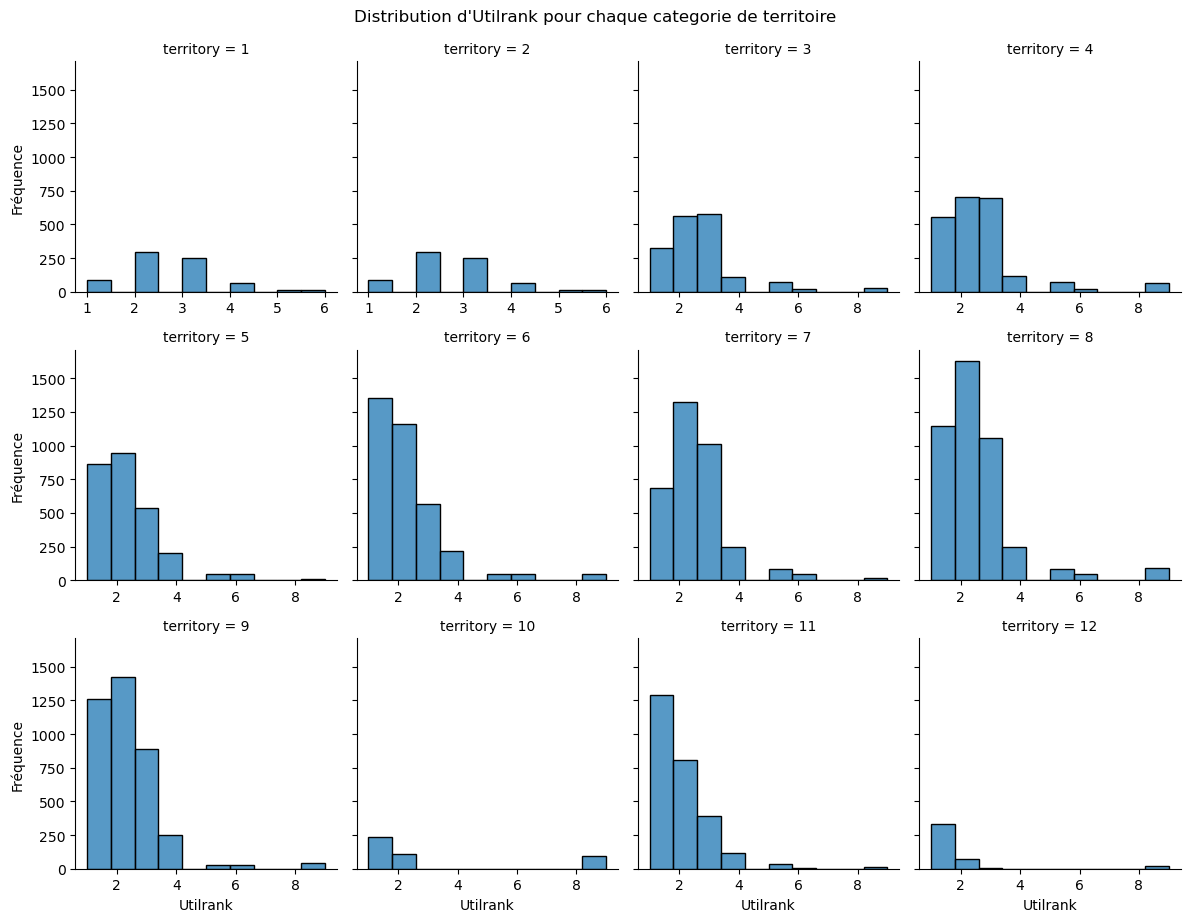

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# avec seaborn, on fait un pavage pour grapher dedans
g = sns.FacetGrid(total_dataset_clean, col="territory", col_wrap=4, height=3, sharex=False)

# distribution d'Utilrank pour chaque categorie de territoire
g.map(sns.histplot, "Utilrank", bins=10, kde=False)

# axes, labels, titres
g.set_axis_labels("Utilrank", "Fréquence")
g.fig.suptitle("Distribution d'Utilrank pour chaque categorie de territoire", y=1.02)

plt.show() #notre plot

<Axes: xlabel='territory', ylabel='Utilrank'>

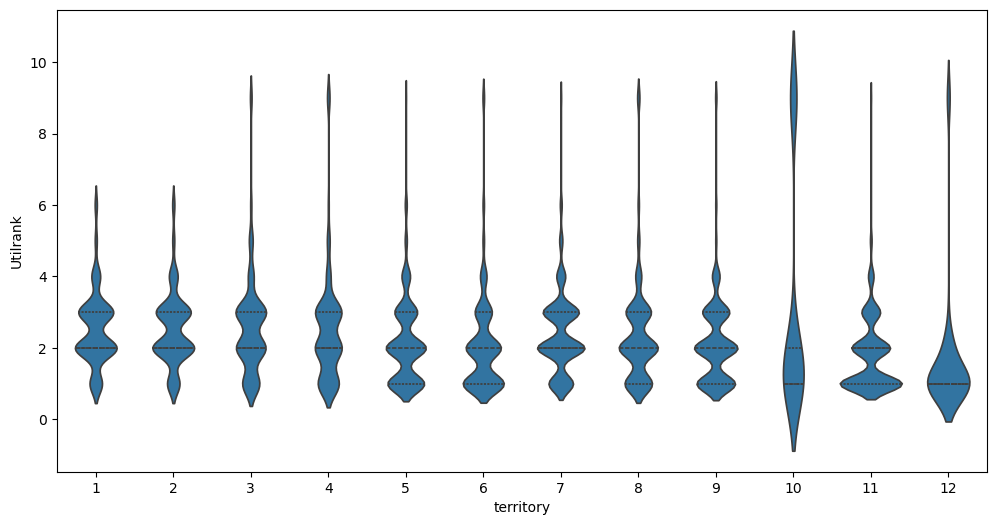

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# on fait un violin plot avec seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(x="territory", y="Utilrank", data=total_dataset_clean, inner="quartile")


Sources de ce Notebook : 

[World Bank (2023)](https://data.worldbank.org/indicator/SL.TLF.TOTL.IN?locations=CO)